In [1]:
using POMDPs
using POMDPToolbox
using POMDPModels

In [2]:
mdp = GridWorld()

POMDPModels.GridWorld(10,10,POMDPModels.GridWorldState[POMDPModels.GridWorldState(4,3,false),POMDPModels.GridWorldState(4,6,false),POMDPModels.GridWorldState(9,3,false),POMDPModels.GridWorldState(8,8,false)],[-10.0,-5.0,10.0,3.0],0.0,0.7,Set(POMDPModels.GridWorldState[POMDPModels.GridWorldState(8,8,false),POMDPModels.GridWorldState(9,3,false)]),0.95)

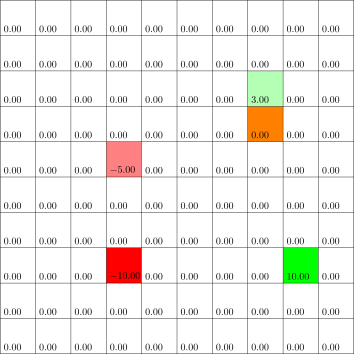

In [17]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
plot(mdp, map(s->reward(mdp,s,:left), iterator(states(mdp))), s0)

In [4]:
@show actions(mdp)

actions(mdp) = Symbol[:up,:down,:left,:right]


4-element Array{Symbol,1}:
 :up   
 :down 
 :left 
 :right

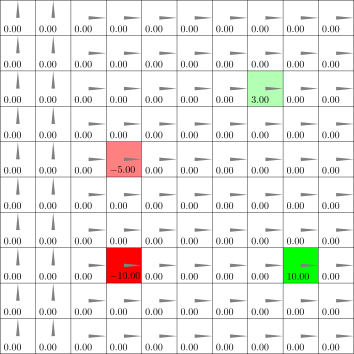

In [5]:
# define your policy here
function mypolicy(s)
    if s.x > 2
        return :right
    else
        return :up
    end
end

# plot the policy
plot(mdp, s->reward(mdp, s, :up), FunctionPolicy(mypolicy))

Interact.Options{:SelectionSlider,Int64}(17: "input-5" = 25 Int64 ,"i",25,"25",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",42=>"42",29=>"29",8=>"8",20=>"20",14=>"14"…)),Any[],Any[],true,"horizontal")

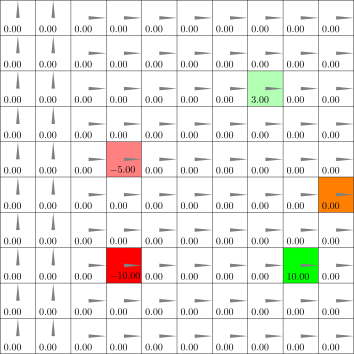

In [10]:
using Interact
value = Interact.value
# show a single simulation
policy = FunctionPolicy(mypolicy)
sim = HistoryRecorder(max_steps=50)
hist = simulate(sim, mdp, policy)
@manipulate for i in 1:length(hist)
    state = state_hist(hist)[i]
    plot(mdp, s->reward(mdp, s, :up), policy, state)
end

In [14]:
# Use Monte Carlo Simulation to evaluate the policy
N = 10000
ro = RolloutSimulator(max_steps=100)
policy = FunctionPolicy(mypolicy)
sum = 0.0
for i in 1:N
    sum += simulate(ro, mdp, policy)
end
println("Mean discounted cumulative reward: $(sum/N)")

Mean discounted cumulative reward: 0.3894096839589355
